In [1]:
import pandas as pd

In [2]:
churn = pd.read_csv(r'D:\Mitsu\MS-ISM\508 - Data Mining I\Week4\DataSet\Telco-Customer-Churn-1.csv')

In [3]:
churn.shape

(7032, 20)

In [4]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
churn['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [8]:
X = pd.get_dummies(churn.iloc[:, 0:19],drop_first=True)
X

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7028,72,103.20,7362.90,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7029,11,29.60,346.45,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7030,4,74.40,306.60,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [9]:
#Encoding target variable
from sklearn.preprocessing import LabelEncoder

In [10]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(churn['Churn'].values)
y

array([0, 0, 1, ..., 0, 1, 0])

In [11]:
#Split into train and test
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train.shape

(5625, 30)

In [13]:
#Create a Decision Tree Model
#Then we build a model using the default setting of fully developing the tree
#(growing the tree until all leaves are pure).
from sklearn.tree import DecisionTreeClassifier

In [14]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 0.998


In [16]:
#evaluate decision tree on test set
y_pred = tree.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.733


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[846 192]
 [183 186]]


In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

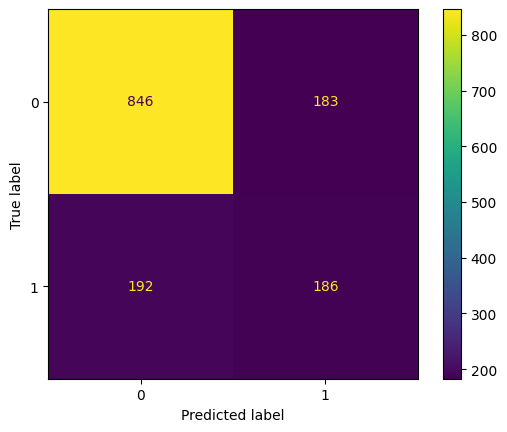

In [22]:
cm = confusion_matrix(y_pred, y_test, labels=tree.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
cm_disp.plot()

In [23]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.733


In [24]:
#The Issue of Overfitting
tree_pruned = DecisionTreeClassifier(max_depth=4, random_state=0) 
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Accuracy on training set: {:.3f}".format(tree_pruned.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pruned_pred, y_test)))

Accuracy on training set: 0.791
Accuracy on test set: 0.785


In [27]:
#Visualizing and Analyzing the tree
importance = pd.DataFrame(tree.feature_importances_, index = X.columns, columns = ['Importance of Features'])
importance

,Importance of Features
tenure,0.202008
MonthlyCharges,0.198780
TotalCharges,0.197211
gender_Male,0.025480
SeniorCitizen_yes,0.021220
Partner_Yes,0.019240
Dependents_Yes,0.019740
PhoneService_Yes,0.000542
MultipleLines_No phone service,0.003927
MultipleLines_Yes,0.020589


In [28]:
## some settings might need to install and import graphviz
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

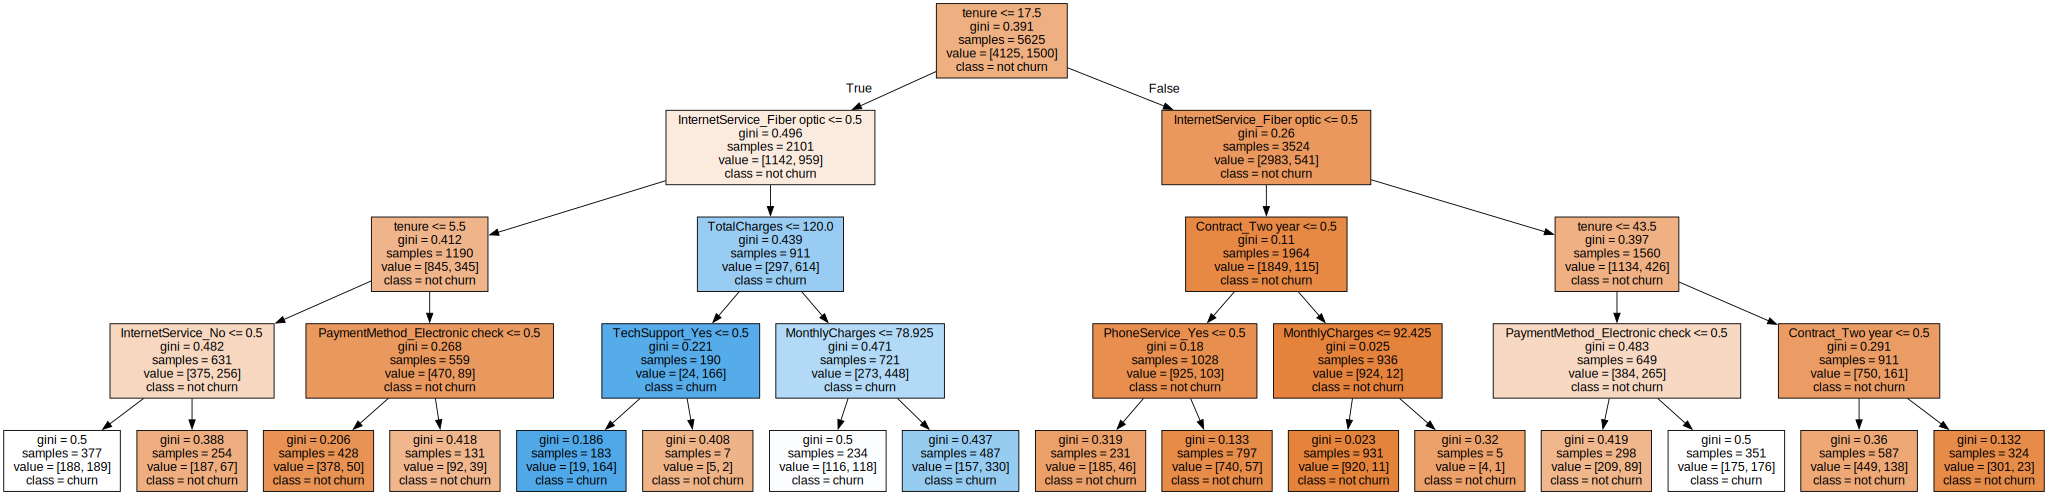

In [29]:
dot_data = export_graphviz(tree_pruned,
class_names= ["not churn", "churn"],
feature_names=X_train.columns,
filled = True)
graph = graphviz.Source(dot_data, format= "png")
graph

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

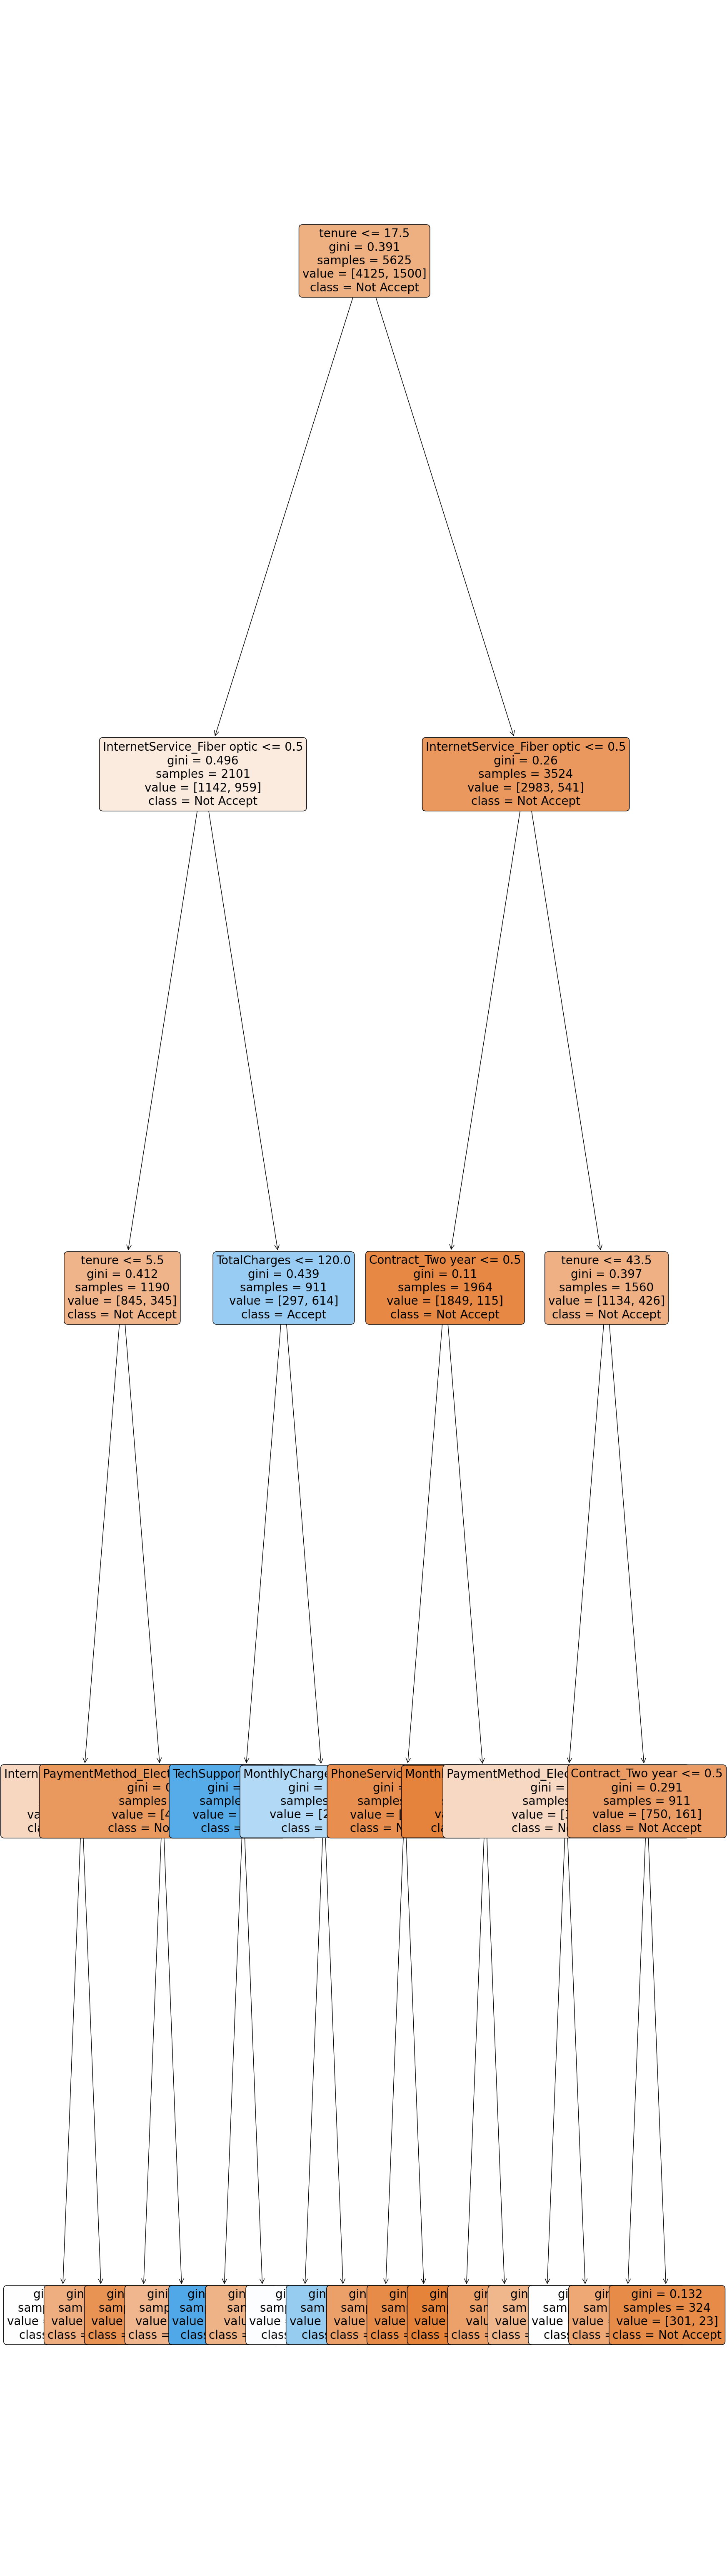

In [31]:
plt.figure(figsize=(20,80))
display_tree = plot_tree(tree_pruned, feature_names=X_train.columns, class_names=["Not Accept","Accept"], filled=True, rounded=True, fontsize=20)

In [32]:
#keep probabilities for the positive outcome only
tree_pruned.predict_proba(X_test)
y_pruned_pred_proba = tree_pruned.predict_proba(X_test)[:,1]

In [33]:
# create roc curve and calculate auc value
from sklearn import metrics
from matplotlib import pyplot

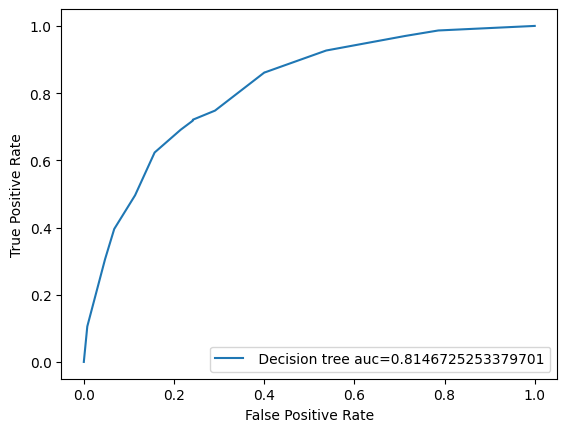

In [34]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pruned_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pruned_pred_proba)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
plt.show()